<a href="https://colab.research.google.com/github/brinal8055/Machine-Learning/blob/master/180010030_Regression_PRML_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/brinal8055/MachineLearning/blob/master/Assignment-1/180010030_Regression_PRML_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Programming Assignment :  Regression

Course Advisor: Prof. S.R.M. Prasanna

Course TA's: Jagabandhu Mishra (183081002@iitdh.ac.in) and 
             Seema K. (173021001@iitdh.ac.in)

Student name: Savsaviya Brinal (180010030)

Regression:

Regression is generally used for curve fitting task. Here we will demonstrate regression task for the following.

1) Fitting of line (one variable learning)

2) Fitting of line (two variable learning) 

3) Fitting of a plane (two variable)

4) Fitting of M-dimentional hyperplane (M-dimention, both in matrix inversion and gradient descent)

5) Polynomial regression

6) Pratical example of regression task (salary prediction)

# 1) Fitting of line

a) Generation of line data ($y=w_{1}x+w_{0}$)

i) Generate x, 1000 points from 0-1.

ii) Take $w_{0}=10$ and $w_{1}=1$ and generate y

iii) Plot (x,y)



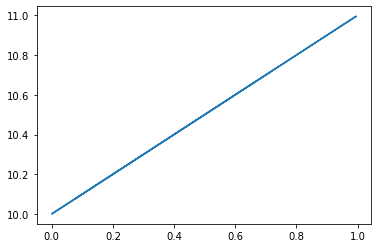

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.random.rand(1000)
y=x+10
plt.plot(x,y)

b) Corrupt the data using uniformly sampled random noise.

i) Generate random numbers uniformly from (0-1) with same size as y.

ii) Corrupt y and generate $y_{cor}$ by adding the generated randomsamples with a weight of 0.1.

iii) Plot (x,$y_{cor}$) (use scatter plot)

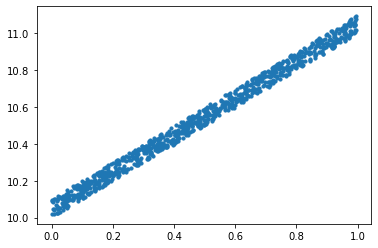

In [ ]:
y_cor= y+ 0.1*np.random.uniform(0,1,y.shape)
plt.scatter(x,y_cor,s=10)

c)  Curve prediction using hurestic way.

i) Keep $w_{0}=10$ as constant and find $w_{1}$ ?

ii) Create a search space from -5 to 7 for $w_{1}$, by generating 1000 numbers between that.

iii) Find $y_{pred}$ using each value of $w_{1}$.

iv) The $y_{pred}$ that provide least norm error with y, will be decided as best $y_{pred}$.

$$error=\frac{1}{m}\sum_{i=1}^{M}(y_{cor_{i}}-y_{pred_{i}})^2$$

v) Plot error vs srch_$w1$

vi) First plot the scatter plot (x,$y_{cor}$) , over that plot (x,$y_{bestpred}$).

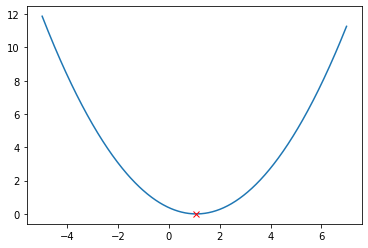

1.0584034846597987


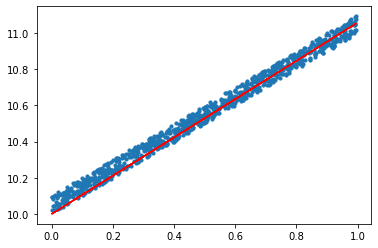

In [ ]:
w_1 = np.random.uniform(-5,7,y_cor.shape)

a=len(w_1)
w_1.sort()
error=np.empty(a)
min_error = pow(10,5)
w_bestpred = 0

for i in range(a):
    y_pred = w_1[i]*x+10
    error[i]=np.mean(np.power(y_cor-y_pred,2))
    if min_error > error[i]:
        min_error = error[i]
        w_bestpred = w_1[i]

plt.plot(w_1,error,w_bestpred,min_error,'rx')
plt.show()

print(w_bestpred)
plt.scatter(x,y_cor,s=10)
plt.plot(x,w_bestpred*x+10,'r')
plt.show()

d) Gradient descent

i) $Error=\frac{1}{m}\sum_{i=1}^{M}(y_{cori}-y_{pred_{i}})^2=\frac{1}{m}\sum_{i=1}^{M}(y_{cori}-(w_{0}+w_{1}x_{i}))^2$

ii) $\nabla Error|_{w1}=\frac{-2}{M}\sum_{i=1}^{M}(y_{cori}-y_{pred_{i}}) \times x_{i}$

iii) $w_{1}|_{new}=w_{1}|_{old}-\lambda \nabla Error|_{w1}=w_{1}|_{old}+ \frac{2\lambda}{M}\sum_{i=1}^{M}(y_{cori}-y_{pred_{i}}) \times x_{i}$

1.0772365992102497


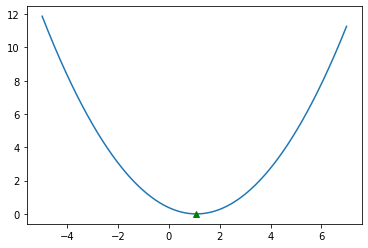

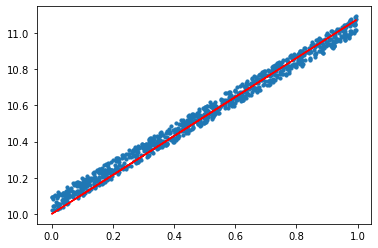

In [ ]:
w1=8.00000
lr = 0.1
k=0.00000
eps = 0.000001

while abs(w1-k)> eps:
    y_pred = w1*x+10
    k=w1
    res_list = [(y_cor[i]-y_pred[i]) * x[i] for i in range(len(x))]
    w1=w1+(lr*np.mean(res_list))
    
print(w1)

y_pred = w1*x+10
res_list1 = [pow((y_cor[i]-y_pred[i]),2) for i in range(a)]
error_gd=np.mean(res_list1)

plt.plot(w_1,error,w1,error_gd,'g^')
plt.show()

plt.scatter(x,y_cor,s=10)
plt.plot(x,w1*x+10,'r')
plt.show()

# 2) Fitting line with two unknown variables

a) Generation of line data ($y=w_{1}x+w_{0}$)

i) Generate x, 1000 points from 0-1.

ii) Take $w_{0}=5$ and $w_{1}=1.5$ and generate y

iii) Plot (x,y)

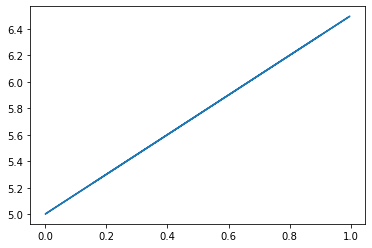

In [ ]:
x = np.random.rand(1000)
y=(1.5*x)+5
plt.plot(x,y)


b) Corrupt the data using uniformly sampled random noise.

i) Generate random numbers uniformly from (0-1) with same size as y.

ii) Corrupt y and generate $y_{cor}$ by adding the generated randomsamples with a weight of 0.1.

iii) Plot (x,$y_{cor}$) (use scatter plot)

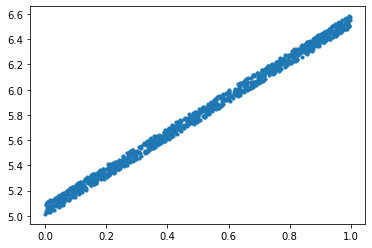

In [ ]:
noise = np.random.uniform(0,1,y.shape)
y_cor=y+(noise*0.1)
plt.scatter(x,y_cor,s=10)

c) Plot the error surface

we have all the data points available in $y_{cor}$, now we have to fit a line with it. (i.e from $y_{cor}$ we have to predict the true value of $w_{1}$ and $w_{0}$)

i) take $w_{1}$ and $w_{0}$ from -10 to 10, to get the error surface.

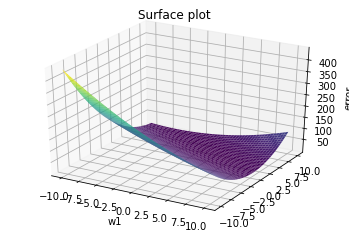

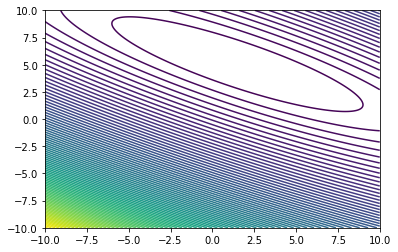

In [ ]:
w0 = np.linspace(-10.0, 10.0, 1000)
w1 = np.linspace(-10.0, 10.0, 1000)


err = []
for i in w0:
    err1 = []
    for j in w1:
        err1.append(np.mean(np.power((y_cor - i - j*x),2)))
    err.append(np.asarray(err1))
        
W0, W1 = np.meshgrid(w0, w1)        
err = np.asarray(err)

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(W0, W1, err,cmap='viridis', edgecolor='none')
ax.set_title('Surface plot')
ax.set_xlabel("w0")
ax.set_xlabel("w1")
ax.set_zlabel("error")
plt.show()

plt.contour(w0,w1,err,100)
plt.show()

d) Gradient descent:

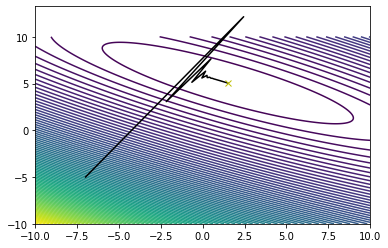

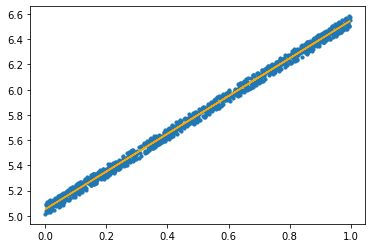

In [ ]:
# Gradient descent
w1_init = -7 # initialization 
w0_init = -5
lr = 0.6  # learning rate (0.9 diverges, 0.6 quite interesting)
eps = 0.000001

w0_g= []
w1_g=[]
alpha_0=1000
alpha_1=1000

while abs(alpha_0)>eps or abs(alpha_1)>eps:
    w0_g.append(w0_init)
    w1_g.append(w1_init)
    y_predg = w1_init*x + w0_init
    alpha_0 = -2*lr*np.mean(y_cor-y_predg)
    alpha_1 = -2*lr*np.mean((y_cor-y_predg)*x)
    w0_init -= alpha_0
    w1_init -= alpha_1

plt.contour(w0,w1,err,100)
plt.plot(np.asarray(w1_g),np.asarray(w0_g),'black')
plt.plot(w1_init,w0_init,'yx')
plt.show()
plt.scatter(x,y_cor,s=10)
plt.plot(x,w0_init + w1_init*x,c='orange')

#  3. Fitting of a plane (two variables)

Here, we will try to fit plane using multiveriate regression

i) Generate x1 and x2 from range -1 to 1, (30 samples)

ii) Equation of plane $y=w0+w1x1+w2x2$

iii) Here we will fix w0 and will learn w1 and w2 

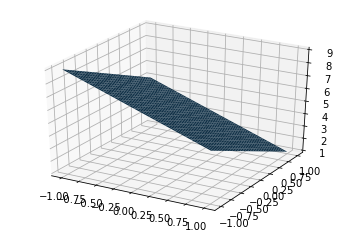

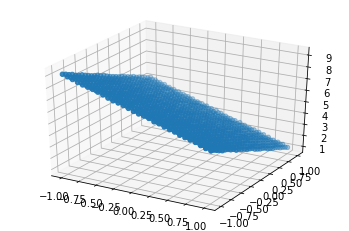

In [ ]:
# write your code here
w0 = 5
w1 = -2
w2 = -2

x1 = np.linspace(-1, 1, 30)
x2 = np.linspace(-1, 1, 30)

X1, X2 = np.meshgrid(x1, x2)
y = np.asarray(w0 + w1*X1 + w2*X2)

y_cor = y + 0.1*np.random.rand(30,30)

ax = plt.axes(projection='3d')
ax.plot_surface(X1,X2,y)
plt.show()

ax = plt.axes(projection='3d')
ax.scatter(X1,X2,y_cor)
plt.show()

b) Generate Error surface

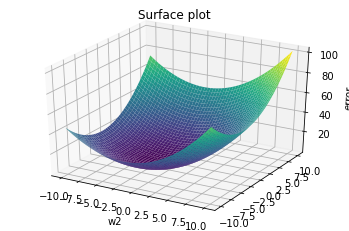

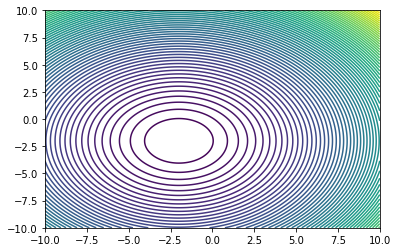

In [ ]:
w1 = np.linspace(-10.0, 10.0, 1000)
w2 = np.linspace(-10.0, 10.0, 1000)


err = []
for i in w2:
    err1 = []
    for j in w1:
        err1.append(np.mean(np.power((y_cor - w0 - j*X1 - i*X2),2)))
    err.append(np.asarray(err1))
        
W1, W2 = np.meshgrid(w1, w2)        
err = np.asarray(err)

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(W1, W2, err,cmap='viridis', edgecolor='none')
ax.set_title('Surface plot')
ax.set_xlabel("w1")
ax.set_xlabel("w2")
ax.set_zlabel("error")
plt.show()

plt.contour(W1,W2,err,100)
plt.show()

c) Gradient descent:

-1.9980542270705977
-1.9996799269174421


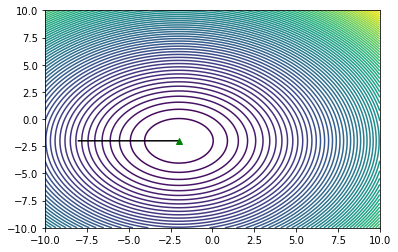

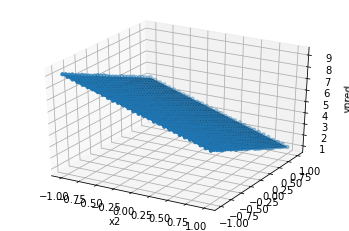

In [ ]:
# Gradient descent
w1_init = -2 # initialization 
w2_init = -8
lr = 0.05  # learning rate 
eps = 0.000001

w2_g= []
w1_g=[]
alpha_1=1000
alpha_2=1000

while abs(alpha_2)>eps or abs(alpha_1)>eps:
    w1_g.append(w1_init)
    w2_g.append(w2_init)
    y_predg = w2_init*X2 + w1_init*X1 + w0
    alpha_1 = -2*lr*np.mean((y_cor-y_predg)*X1)
    alpha_2 = -2*lr*np.mean((y_cor-y_predg)*X2)
    w1_init -= alpha_1
    w2_init -= alpha_2

print(w1_init)
print(w2_init)
plt.contour(w1,w2,err,100)
plt.plot(np.asarray(w2_g),np.asarray(w1_g),'black')
plt.plot(w2_init,w1_init,'g^')
plt.show()

ax = plt.axes(projection='3d')
ax.scatter(X1,X2,y_cor,s=10)
ax.set_xlabel("x1")
ax.set_xlabel("x2")
ax.set_zlabel("ypred")
ax.plot_surface(X1,X2,y_predg)

# 4. Fitting of M-dimentional hyperplane (M-dimention, both in matrix inversion and gradient descent)

Here we will vectorize the input and will use matrix method to solve the regression problem.

let we have M- dimensional hyperplane we have to fit using regression, the inputs are $x1, x2, x3,...,x_M$. in vector form we can write $[x1,x2,...,x_M]^{T}$, and similarly the weights are $w1, w2, ...w_M$ can be written as a vector $[w1,w2,...w_M]^{T}$ , Then the equation of the plane can be written as:
$$y=w1x1+w2x2+...+w_Mx_M$$

$w1, w2,....,wM$ are the scalling parameters in M different direction, and we also need a offset parameter w0, to capture the offset variation while fitting.

The final input vector (generally known as augmented feature vector) is represented as $[1,x1,x2,...,x_{M}]^{T}$ and the weight matrix is $[w0,w1,w2,...w_M]^{T}$, now the equation of the plane can be written as:
$$y=w0+w1x1+w2x2+...+w_Mx_M$$ 

In matrix notation: $y=x^{T} w$ (for a single data point), but in general we are dealing with N- data points, so in matrix notation
$$Y=X^{T}W$$
where Y is a $N \times 1$ vector, X is a $M \times N$ matrix and W is a $M \times 1$ vector. 

$$Error=\frac{1}{N}||Y-X^{T}W||^{2}$$

it looks like a optimization problem, where we have to find W,  which will give minimum error.

1. **By computation:**

$\nabla Error=0$ will give us $W_{opt}$, then $W_{opt}$ can be written as:

$$W_{opt}=(XX^{T})^{-1}XY$$

2. **By gradient descent:**

$$W_{new}=W_{old}+\frac{2\lambda}{N}X(Y-X^{T}W_{old})$$

(5, 1000)
(6, 1)
(6, 1000)
(1000, 1)
[[1.04851733]
 [1.99942185]
 [3.00296442]
 [4.99868186]
 [9.00042671]
 [3.00140108]]
[[1.04790692]
 [1.99770118]
 [2.99634257]
 [4.9908057 ]
 [8.9813149 ]
 [3.00160572]]


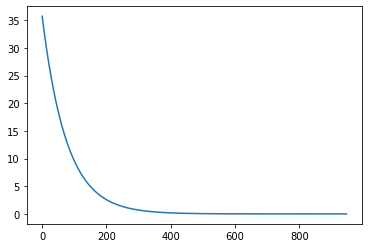

In [2]:
import numpy as np
import matplotlib.pyplot as plt

class regression:
  # Constructor
    def __init__(self, name='reg'):
        self.name = name  

    def grad_update(self,w_old,lr,y,x):
        w = w_old + (2*lr*(x@(y-(x.T@w_old)))/y.shape[0])
        return w

    def error(self,w,y,x):
        return np.sum(np.square(y-(x.T@w)))/y.shape[0]

    def mat_inv(self,y,x_aug):
        return (np.linalg.pinv(x_aug@x_aug.T))@x_aug@y

    def Regression_grad_des(self,x,y,lr):
    
        threshold = 0.001
        err = []
        w_pred = np.random.rand(6,1)
    
        while self.error(w_pred,y,x)>threshold:
            err.append(self.error(w_pred,y,x))
            w_pred = self.grad_update(w_pred,lr,y,x)
        
        err = np.asarray(err)
        return w_pred,err


############################################################################################################
# Generation of data
sim_dim=5
sim_no_data=1000
x=np.random.uniform(-1,1,(sim_dim,sim_no_data))
print(x.shape)

w=np.array([[1],[2],[3],[5],[9],[3]]) # W=[w0,w1,.....,wM]'
print(w.shape)

# # augment feat

x_aug=np.concatenate((np.ones((1,x.shape[1])), x),axis=0)
print(x_aug.shape)


y=x_aug.T @ w  # vector multiplication
print(y.shape)


## corrupted by noise
nois=np.random.uniform(0,1,y.shape)
y=y+0.1*nois

### the data (x_aug and y is generated)#####
###############################################################################################################
# by computation (Normal equation)
reg=regression()
w_opt=reg.mat_inv(y,x_aug)
print(w_opt)

# by Gradien descent
lr=0.01
w_pred,err=reg.Regression_grad_des(x_aug,y,lr)
print(w_pred)

plt.plot(err)
  

    

# 5. Polynomial regression:

1. Generate data using relation $y=0.25x^{3}+1.25x^{2}-3x-3$
2. Corrupt y by adding random noise (uniformly sampled)
3. fit the generated curve using different polynomial order. (Using matrix inversion, and Home work using gradient descent)

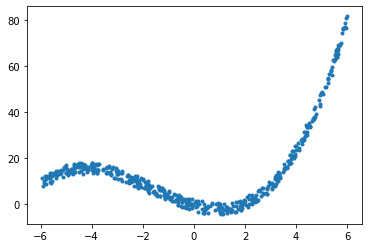

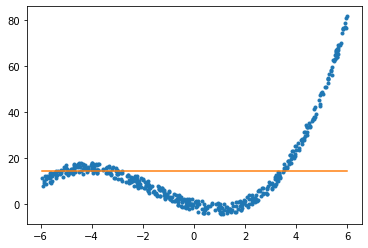

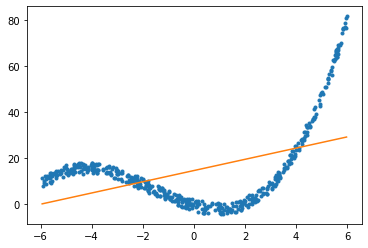

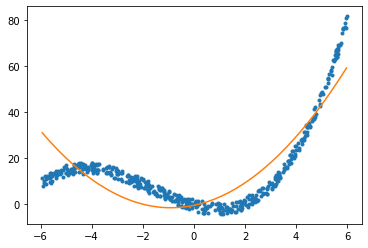

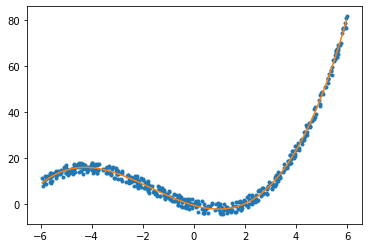

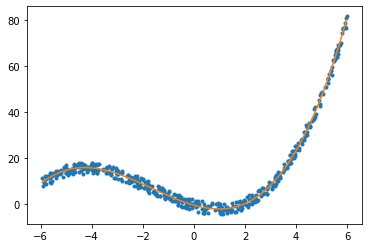

In [ ]:
w=[-3,-3,1.25,0.25]
x=np.random.uniform(-6,6,500)
x.sort()
x= np.asarray(x)
# write your code here

def data_transform(X,degree): 
    
    X_new = np.empty([degree+1,len(X)],float)
    for i in range(degree+1):
        X_new[i] = np.power(X,i)
    return X_new


X=data_transform(x,3)

y=X.T @ w
y=y+5*np.random.uniform(0,1,y.shape)

plt.plot(x.T,y,'.')

reg=regression()

# by computation

# for degree 0 polynomial fitting
degree=0
X_0=data_transform(x,degree)
w_mat=reg.mat_inv(y,X_0)
y_pred=X_0.T @ w_mat
plt.figure()
plt.plot(x.T,y,'.')
plt.plot(x.T,y_pred)


# for degree 1 polynomial fitting
degree=1
X_1=data_transform(x,degree)
w_mat=reg.mat_inv(y,X_1)
y_pred=X_1.T @ w_mat
plt.figure()
plt.plot(x.T,y,'.')
plt.plot(x.T,y_pred)

# for degree 2 polynomial fitting
degree=2
X_2=data_transform(x,degree)
w_mat=reg.mat_inv(y,X_2)
y_pred=X_2.T @ w_mat
plt.figure()
plt.plot(x.T,y,'.')
plt.plot(x.T,y_pred)


# for degree 3 polynomial fitting
degree=3
X_3=data_transform(x,degree)
w_mat=reg.mat_inv(y,X_3)
y_pred=X_3.T @ w_mat
plt.figure()
plt.plot(x.T,y,'.')
plt.plot(x.T,y_pred)


# for degree 4 polynomial fitting
degree=4
X_4=data_transform(x,degree)
w_mat=reg.mat_inv(y,X_4)
y_pred=X_4.T @ w_mat
plt.figure()
plt.plot(x.T,y,'.')
plt.plot(x.T,y_pred)

# 6: Practical example (salary prediction)

1. Read data from csv file
2. Do train test split (90% and 10%)
3. Perform using matrix inversion and using Gradiant descent  method
4. find the mean square error in test. (as performance measure) 

In [ ]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

link = 'https://drive.google.com/u/0/uc?id=15TFzgaRMaENglApfKjbNDunstoZmmz9z'
fluff, id = link.split('=')
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('data.csv') 

import pandas as pd
import numpy as np

df = pd.read_csv("data.csv")

x=df.to_numpy()
np.random.shuffle(x)
y = np.hsplit(x,6)[5]
x=x[0:1000,0:5].T
x_aug=np.concatenate((np.ones((1,x.shape[1])), x),axis=0)

x_train = x_aug.T[100:].T
y_train = y[100:].T[0]

x_test = x_aug.T[:100].T
y_test = y[:100].T[0]

reg=regression()
w_pred = reg.mat_inv(y_train,x_train)
error_train = reg.error(w_pred,y_train,x_train)/((np.max(y_train)-np.mean(y_train))**2)
error_test = reg.error(w_pred,y_test,x_test)/((np.max(y_test)-np.mean(y_test))**2)
y_pred = x_test.T@w_pred

print('Using Matrix Inversion Method:- \n')
print('Normalized training error=',error_train)
print('Normalized testing error=',error_test)
print('predicted salary=',y_pred[0:3])
print('actual salary=',y_test[0:3],'\n')

lr = 0.0005
w_predg,errg = reg.Regression_grad_des(x_train,y_train,lr)
error_traing = reg.error(w_predg,y_train,x_train)/((np.max(y_train)-np.mean(y_train))**2)
error_testg = reg.error(w_predg,y_test,x_test)/((np.max(y_test)-np.mean(y_test))**2)
y_predg = x_test.T@w_predg

print('Using Gradiant Descent Method:- \n')
print('Normalized training error=',error_traing)
print('Normalized testing error=',error_testg)
print('predicted salary=',y_predg[0:3])
print('actual salary=',y_test[0:3])



Using Matrix Inversion Method:- 

Normalized training error= 0.028378582684177187
Normalized testing error= 0.036754546113356996
predicted salary= [60910.45758015 63591.83249974 49591.03226264]
actual salary= [57344 72752 46268] 

